Libraries:

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Reading the CSV file:

In [359]:
df = pd.read_csv('WSNBFSFdataset V2.csv')


Understanding the data:

behaviour feature:


In [360]:
# The count of each value in the Event column
frequency_count = df['behaviour'].value_counts()
# Make it as data DataFrame
frequency_df = pd.DataFrame({'behaviour': frequency_count.index, 'Count': frequency_count.values})

print(frequency_df)


      behaviour   Count
0     No attack  262851
1  Under attack   49255


In [361]:
# The count of each value in the behaviour column
freq_table = df['behaviour'].value_counts()

# Create a bar plot for the 'behaviour' categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='behaviour', palette='Set1')
plt.title(f"Distribution of {'behaviour'} feature")
plt.xlabel('behaviour')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Type of attack feature:

In [362]:
# The count of each value in the Event a column
frequency_count = df['Type'].value_counts()
# Make it as data DataFrame
frequency_df = pd.DataFrame({'Type': frequency_count.index, 'Count': frequency_count.values})

print(frequency_df)


         Type   Count
0      normal  262851
1    Flooding   29844
2   Blackhole   11766
3  Forwarding    7645


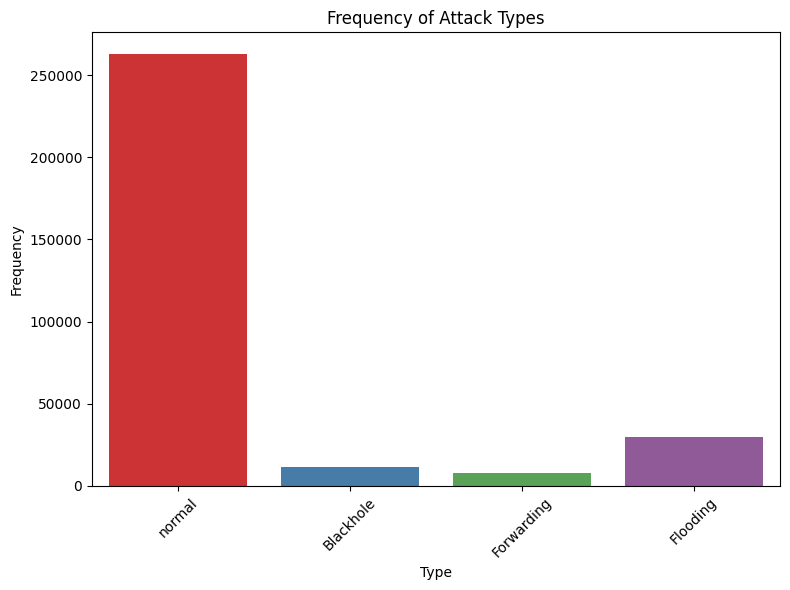

In [363]:
# Examine the distribution of the 'Type' categorical feature
freq_table = df['Type'].value_counts()

# Create a bar plot for the 'Type' categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type', palette='Set1')
plt.title(f"Frequency of Attack Types")
plt.xlabel('Type')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


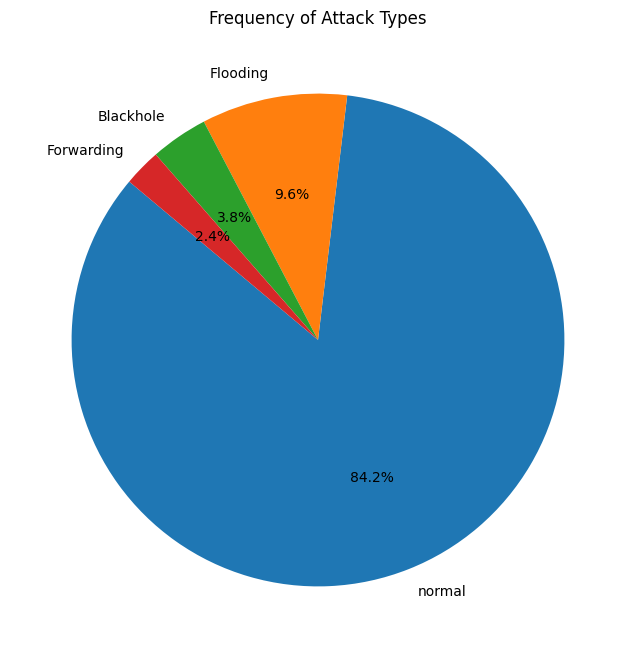

In [364]:
# Calculate the frequency of each attack type
attack_type_counts = df['Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(attack_type_counts, labels=attack_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Attack Types')
plt.show()


Event feature:

In [365]:
# The count of each value in the Event a column
frequency_count = df['Event'].value_counts()
# Make it as data DataFrame
frequency_df = pd.DataFrame({'Event': frequency_count.index, 'Count': frequency_count.values})

print(frequency_df)


   Event   Count
0      2  248406
1      4   46274
2      1   17426


In [366]:
# Mapping of event values to their meanings
event_mapping = {
    1: 'Sending',
    2: 'Receiving',
    4: 'Dropping'
}

# Map the event values to their meanings in the DataFrame
df['Event_Label'] = df['Event'].map(event_mapping)

# Examine the distribution of the 'Event' categorical feature
feature = 'Event_Label'
freq_table = df['Event_Label'].value_counts()

# Create a bar plot for the 'Event' categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Event_Label', palette='Set1')
plt.title(f"Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Event Type with Behaviour Under Attack

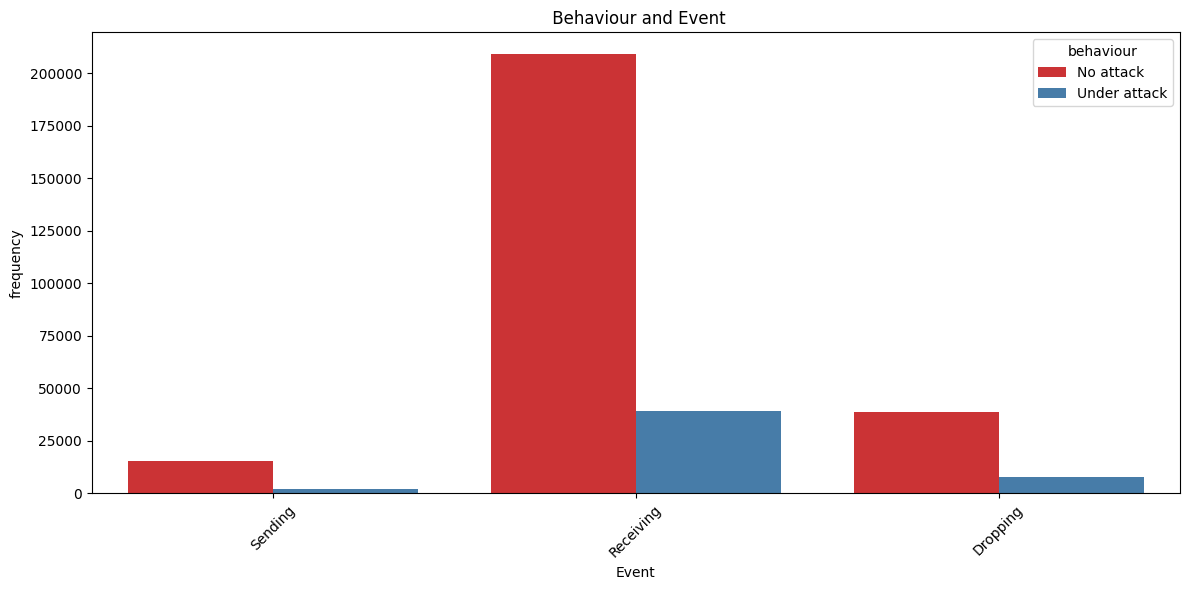

In [367]:
# Group data by 'Behaviour' and 'Event', and calculate the total count of instances for each combination
grouped = df.groupby(['behaviour', 'Event']).size().reset_index(name='Total_Count')

# Mapping of event values to their meanings
event_mapping = {
    1: 'Sending',
    2: 'Receiving',
    4: 'Dropping'
}

# Map the event values to their meanings in the grouped DataFrame
grouped['Event_Label'] = grouped['Event'].map(event_mapping)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Event_Label', y='Total_Count', hue='behaviour', data=grouped, palette='Set1')
plt.title(' Behaviour and Event')
plt.xlabel('Event')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Starting with the Flooding Attack**

Flooding attack with Events

In [368]:
# Filter the DataFrame to include only rows with 'Flooding' attacks
flooding_data = df[df['Type'] == 'Flooding']

# Calculate the frequency of flooding attacks based on the event
flooding_event_freq = flooding_data['Event'].value_counts().reset_index()
flooding_event_freq.columns = ['Event', 'Frequency']

# Map event values to their meanings
event_mapping = {
    1: 'Sending : 1',
    2: 'Receiving : 2',
    4: 'Dropping : 3'
}
flooding_event_freq['Event_Label'] = flooding_event_freq['Event'].map(event_mapping)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Event_Label', y='Frequency', data=flooding_event_freq, palette='Set1')
plt.title('Frequency of Flooding Attacks based on Event')
plt.xlabel('Event')
plt.ylabel('Frequency of Flooding attack')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


TTL with Flooding Attack

In [369]:
# Get the unique values in the 'TTL' column
unique_ttl_values = df['TTL'].unique()

# Print the unique TTL values
print(unique_ttl_values)


[30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14  8  7  6  5  4  3  2
  1  0]


In [370]:
# Filter the dataset to include only rows where there's a 'flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Group data by 'TTL' and calculate the total count of 'flooding' attacks for each TTL value
ttl_flooding_attack_count = flooding_attack_data.groupby('TTL').size().reset_index(name='Total_Flooding_Attack_Count')

print("Total count of instances with 'flooding' attack for each TTL value:")
print(ttl_flooding_attack_count)

# Create a bar chart for total count of 'flooding' attacks for each TTL value
plt.figure(figsize=(10, 6))
plt.bar(ttl_flooding_attack_count['TTL'], ttl_flooding_attack_count['Total_Flooding_Attack_Count'])
plt.title("Total Count of 'Flooding' Attacks for Each TTL Value")
plt.xlabel("TTL Value")
plt.ylabel("Total Flooding Attack Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total count of instances with 'flooding' attack for each TTL value:
    TTL  Total_Flooding_Attack_Count
0    20                           22
1    21                          398
2    22                          556
3    23                         1854
4    24                         3167
5    25                         4970
6    26                         6741
7    27                         5532
8    28                         4042
9    29                         2410
10   30                          152


In [371]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows where there's a 'flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Calculate the median of the TTL values for 'flooding' attacks
median_ttl_flooding = flooding_attack_data['TTL'].median()

print("Median of TTL values for 'flooding' attacks:", median_ttl_flooding)


Median of TTL values for 'flooding' attacks: 26.0


Hop count with Flooding attack

In [372]:
# Get the unique values in the 'TTL' column
unique_ttl_values = df['Hop_Count'].unique()

# Print the unique TTL values
print(unique_ttl_values)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [373]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows with 'flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Calculate the total count of instances with 'flooding' attack for each 'Hop_Count' value
hop_count_flooding_attack_count = flooding_attack_data.groupby('Hop_Count').size().reset_index(name='Total_Flooding_Attack_Count')

print("Total count of instances with 'flooding' attack for each Hop_Count value:")
print(hop_count_flooding_attack_count)


Total count of instances with 'flooding' attack for each Hop_Count value:
    Hop_Count  Total_Flooding_Attack_Count
0           1                          152
1           2                         2410
2           3                         4042
3           4                         5532
4           5                         6741
5           6                         4970
6           7                         3167
7           8                         1854
8           9                          556
9          10                          398
10         11                           22


In [374]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows with 'flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Calculate the total count of instances with 'flooding' attack for each 'Hop_Count' value
hop_count_flooding_attack_count = flooding_attack_data.groupby('Hop_Count').size().reset_index(name='Total_Flooding_Attack_Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(hop_count_flooding_attack_count['Hop_Count'], hop_count_flooding_attack_count['Total_Flooding_Attack_Count'])
plt.title("Total count of instances with 'flooding' attack for each Hop_Count value")
plt.xlabel("Hop_Count")
plt.ylabel("Total Flooding Attack Count")
plt.show()


In [375]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows where there's a 'flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Calculate the median of the Hop_Count values for 'flooding' attacks
median_hop_count_flooding = flooding_attack_data['Hop_Count'].median()

print("Median of Hop_Count values for 'flooding' attacks:", median_hop_count_flooding)


Median of Hop_Count values for 'flooding' attacks: 5.0


In [376]:
# Filter the dataset to include only rows where there's a 'Flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Group data by 'TTL' and 'Hop_Count', and calculate the total count of 'Flooding' attacks for each TTL and Hop_Count combination
ttl_hop_flooding_attack_count = flooding_attack_data.groupby(['TTL', 'Hop_Count']).size().reset_index(name='Total_Flooding_Attack_Count')

print("Total count of instances with 'Flooding' attack for each TTL and Hop_Count combination:")
print(ttl_hop_flooding_attack_count)

# Create a bar chart for total count of 'Flooding' attacks for each TTL and Hop_Count combination
plt.figure(figsize=(12, 6))
plt.bar(ttl_hop_flooding_attack_count['TTL'].astype(str) + '-' + ttl_hop_flooding_attack_count['Hop_Count'].astype(str), ttl_hop_flooding_attack_count['Total_Flooding_Attack_Count'])
plt.title("Total Count of 'Flooding' Attacks for Each TTL and Hop_Count Combination")
plt.xlabel("TTL - Hop_Count")
plt.ylabel("Total Flooding Attack Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total count of instances with 'Flooding' attack for each TTL and Hop_Count combination:
    TTL  Hop_Count  Total_Flooding_Attack_Count
0    20         11                           22
1    21         10                          398
2    22          9                          556
3    23          8                         1854
4    24          7                         3167
5    25          6                         4970
6    26          5                         6741
7    27          4                         5532
8    28          3                         4042
9    29          2                         2410
10   30          1                          152


Energy consumption with Flooding Attack

In [377]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Group data by 'Type' and calculate the average energy consumption for each attack type
average_energy_by_type = df.groupby('Type')['energy_consumption'].mean()

print("Average energy consumption for each attack type:")
print(average_energy_by_type)


Average energy consumption for each attack type:
Type
Blackhole     0.047241
Flooding      0.011691
Forwarding    0.045832
normal        0.049499
Name: energy_consumption, dtype: float64


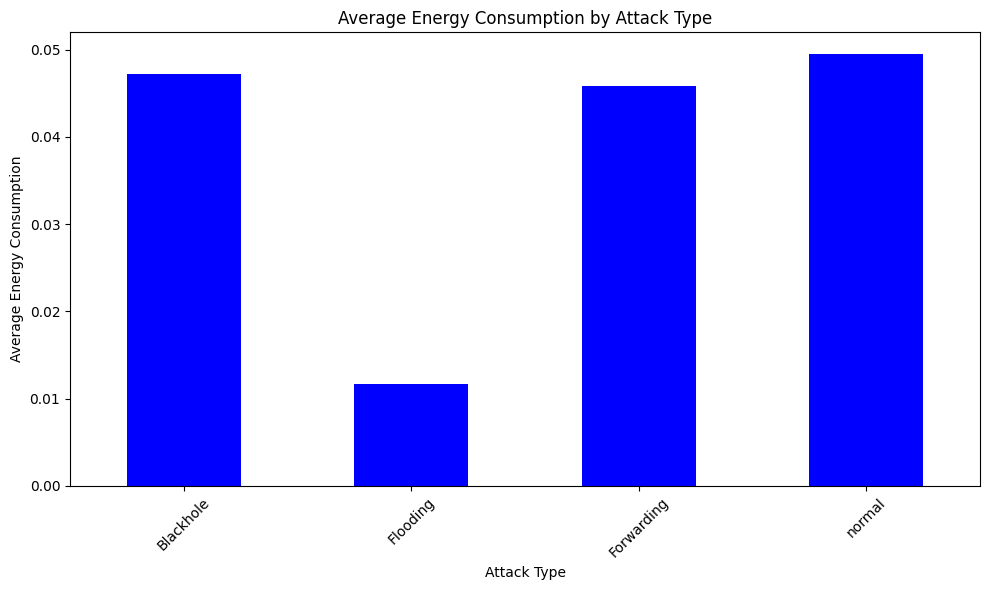

In [392]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Group data by 'Type' and calculate the average energy consumption for each attack type
average_energy_by_type = df.groupby('Type')['energy_consumption'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_energy_by_type.plot(kind='bar', color='blue')
plt.title('Average Energy Consumption by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Average Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


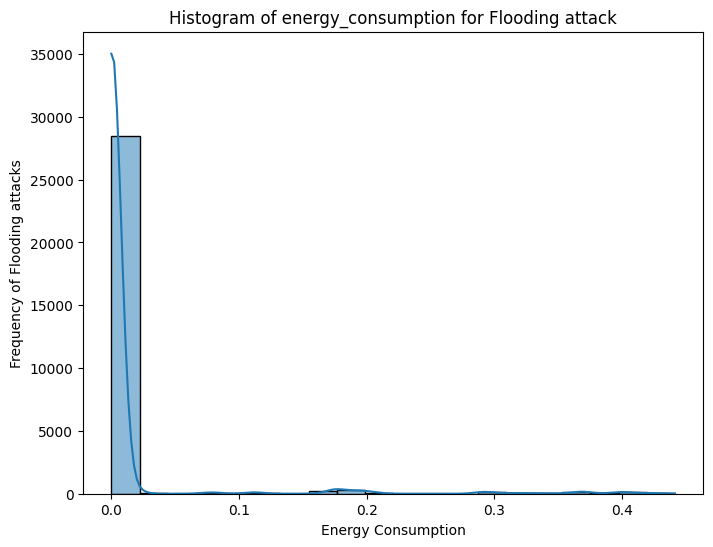

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows with 'Flooding' attack
flooding_data = df[df['Type'] == 'Flooding']

# Create a histogram to show the distribution of energy_consumption for 'Flooding' attack
plt.figure(figsize=(8, 6))
sns.histplot(data=flooding_data, x='energy_consumption', bins=20, kde=True)
plt.title('Histogram of energy_consumption for Flooding attack')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency of Flooding attacks')
plt.show()


In [379]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows with 'Flooding' attack
flooding_data = df[df['Type'] == 'Flooding']

# Find the maximum value of energy_consumption for 'Flooding' attack
max_energy_flooding = flooding_data['energy_consumption'].max()

print("Maximum energy consumption for 'Flooding' attack:", max_energy_flooding)


Maximum energy consumption for 'Flooding' attack: 0.441612


In [380]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the DataFrame to include only rows with 'Flooding' attacks
flooding_data = df[df['Type'] == 'Flooding']

# Calculate the median of the 'energy_consumption' column for Flooding attacks
median_energy_consumption_flooding = flooding_data['energy_consumption'].median()

# Calculate the mode of the 'energy_consumption' column for Flooding attacks
mode_energy_consumption_flooding = flooding_data['energy_consumption'].mode()

print("Median energy consumption for Flooding attacks:", median_energy_consumption_flooding)
print("Mode energy consumption for Flooding attacks:", mode_energy_consumption_flooding)


Median energy consumption for Flooding attacks: 0.000372
Mode energy consumption for Flooding attacks: 0    0.0
Name: energy_consumption, dtype: float64


In [381]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows with 'Flooding' attack
flooding_data = df[df['Type'] == 'Flooding']

# Calculate the mean value of energy_consumption for 'Flooding' attack
mean_energy_flooding = flooding_data['energy_consumption'].mean()

print("Mean energy consumption for 'Flooding' attack:", mean_energy_flooding)


Mean energy consumption for 'Flooding' attack: 0.011691206942769065


In [382]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows with 'Flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Get the unique 'S_Node' values that have flooding attacks
s_nodes_with_flooding = flooding_attack_data['S_Node'].unique()

# Get all unique 'S_Node' values in the DataFrame
all_s_nodes = df['S_Node'].unique()

# Find the 'S_Node' values without any flooding attack
s_nodes_without_flooding = [s_node for s_node in all_s_nodes if s_node not in s_nodes_with_flooding]

print("S_Node values without any flooding attack:")
print(s_nodes_without_flooding)


S_Node values without any flooding attack:
[43, 140]


In [383]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows with 'Flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Get the unique 'S_Node' values that have flooding attacks
s_nodes_with_flooding = flooding_attack_data['S_Node'].unique()

# Get all unique 'S_Node' values in the DataFrame
all_s_nodes = df['S_Node'].unique()

# Find the 'S_Node' values without any flooding attack
s_nodes_without_flooding = [s_node for s_node in all_s_nodes if s_node not in s_nodes_with_flooding]

print("S_Node values without any flooding attack:")
print(s_nodes_without_flooding)


S_Node values without any flooding attack:
[43, 140]


In [384]:


# Group data by 'S_Node' and 'Type' and calculate the count of each type of attack for each 'S_Node' value
attack_count_by_snode_type = df.groupby(['S_Node', 'Type']).size().unstack(fill_value=0)

# Filter 'S_Node' values that have only Blackhole attacks
snodes_with_only_blackhole = attack_count_by_snode_type[attack_count_by_snode_type['Blackhole'] > 0]
snodes_with_only_blackhole = snodes_with_only_blackhole[snodes_with_only_blackhole.sum(axis=1) == snodes_with_only_blackhole['Blackhole']]

print("S_Node values with only Blackhole attacks:")
print(snodes_with_only_blackhole.index.tolist())


S_Node values with only Blackhole attacks:
[140]


In [385]:
# Group data by 'S_Node' and 'Type' and calculate the count of each type of attack for each 'S_Node' value
attack_count_by_snode_type = df.groupby(['S_Node', 'Type']).size().unstack(fill_value=0)

# Get the 'S_Node' value with the most normal attacks
snode_with_most_normal = attack_count_by_snode_type[attack_count_by_snode_type['normal'] == attack_count_by_snode_type['normal'].max()].index[0]

print("S_Node value with the most Normal attacks:", snode_with_most_normal)


S_Node value with the most Normal attacks: 45


In [386]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows with 'Flooding' attack
flooding_attack_data = df[df['Type'] == 'Flooding']

# Get the unique 'S_Node' values that have flooding attacks
s_nodes_with_flooding = flooding_attack_data['S_Node'].unique()

# Get all unique 'S_Node' values in the DataFrame
all_s_nodes = df['S_Node'].unique()

# Find the 'S_Node' values without any flooding attack
s_nodes_without_flooding = [s_node for s_node in all_s_nodes if s_node not in s_nodes_with_flooding]

print("S_Node values without any flooding attack:")
print(s_nodes_without_flooding)


S_Node values without any flooding attack:
[43, 140]


Contingency Table:

In [387]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only the specified 'S_Node' values
selected_s_nodes = [43, 140, 80, 83, 83, 84,  33, 61, 62, 63, 65, 46, 74,143]
filtered_df = df[df['S_Node'].isin(selected_s_nodes)]

# Create a contingency table using crosstab
contingency_table = pd.crosstab(filtered_df['S_Node'], filtered_df['Type'])

print("Contingency Table:")
print(contingency_table)


Contingency Table:
Type    Blackhole  Flooding  Forwarding  normal
S_Node                                         
33           1311        12           0      50
43              0         0        1833       0
46              0       195           0    1786
61           1702         9           0      60
62           1710         7           0      75
63           1622         7           0      59
65           1637        13           0      73
74           1755        12           0      76
80              0        12        1098      72
83              0        12        1697      67
84              0        11        1744      77
140          1838         0           0       0
143             0       177           0    1649


**Proofing the rules:**

In [388]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Filter the dataset to include only rows where the 'Type' is 'Flooding'
flooding_df = df[df['Type'] == 'Flooding']

# Print the new DataFrame containing only flooding attack data
flooding_df.head()


Event       Time  S_Node  Node_id  Rest_Energy  Trace_Level  \
39027      1  72.100000      18       18   585.478844            5   
39028      1  72.100175      18       18   585.478844            5   
39029      2  72.101023      17       17   585.443844            5   
39030      2  72.101023      16       16   585.443678            5   
39031      2  72.101023      15       15   585.470794            5   

       Mac_Type_Pckt  Source_IP_Port  Des_IP_Port  Packet_Size  ...  \
39027              0          18.255        1.255           48  ...   
39028            800          18.255        1.255          106  ...   
39029            800          18.255        1.255           48  ...   
39030            800          18.255        1.255           48  ...   
39031            800          18.255        1.255           48  ...   

       Dest_Node_Num  Dest_Seq_Num  Src_Node_ID  Src_Seq_Num     behaviour  \
39027             36             0           18            4  Under attack   
39028             36             0           18            4  Under attack   
39029             36             0           18            4  Under attack   
39030             36             0           18            4  Under attack   
39031             36             0           18            4  Under attack   

           Type  rate_of_energy_consumption cumulative_energy_consumption  \
39027  Flooding                    0.158608                     14.494690   
39028  Flooding                    0.000000                     14.494690   
39029  Flooding                    0.200704                     14.528524   
39030  Flooding                    0.200641                     14.530495   
39031  Flooding                    0.200413                     14.504889   

      energy_consumption  Event_Label  
39027           0.227796      Sending  
39028           0.000000      Sending  
39029           0.288459    Receiving  
39030           0.288374    Receiving  
39031           0.288046    Receiving  

[5 rows x 23 columns]

In [389]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# Filter the dataset based on the specified conditions and exclude S_Node values 43 and 140
# Also include only events with values 2 and 3
#df = df[(df['Hop_Count'] >= 1) & (df['Hop_Count'] <= 11) &
                # (df['TTL'] >= 20) & (df['TTL'] <= 30) &
                 #(df['energy_consumption'] <= 0.441612) &
                 #(~df['S_Node'].isin([43, 140, 80, 83, 83, 84,  33, 61, 62, 63, 65, 46, 74])) &
                # (df['Event'].isin([2, 4]))]

# Print the filtered DataFrame
#print(df.head(100))
##

In [390]:
import pandas as pd

# Assuming you have a DataFrame named 'filtered_df1'

# Calculate the count of each value in the 'Type' column
frequency_count = flooding_df['Type'].value_counts()

# Convert the frequency_count Series to a DataFrame
frequency_df = pd.DataFrame({'Type': frequency_count.index, 'Count': frequency_count.values})

print(frequency_df)


       Type  Count
0  Flooding  29844


In [391]:
import pandas as pd

# Assuming you have a DataFrame named 'filtered_df1'

# Calculate the count of each value in the 'Type' column
frequency_count =df['Type'].value_counts()

# Convert the frequency_count Series to a DataFrame
frequency_df = pd.DataFrame({'Type': frequency_count.index, 'Count': frequency_count.values})

print(frequency_df)



         Type   Count
0      normal  262851
1    Flooding   29844
2   Blackhole   11766
3  Forwarding    7645
